In [56]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


In [5]:
import zipfile

# Specify the name of the ZIP file (with its extension)
zip_file_name = 'archive (4).zip'

# Create a ZipFile object and extract the contents to the current working directory
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall()


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data paths
train_data_dir = 'chest_xray/chest_xray/train'
validation_data_dir = 'chest_xray/chest_xray/val'
test_data_dir = 'chest_xray/chest_xray/test'

# Define hyperparameters
batch_size = 32
epochs = 10
image_size = (224, 224)

# Data Augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data Augmentation for the validation and test sets
validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'  # For binary classification
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Build a CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}")


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
163/163 [==============================] - 337s 2s/step - loss: 0.4123 - accuracy: 0.8115 - val_loss: 0.6618 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 336s 2s/step - loss: 0.3230 - accuracy: 0.8589 - val_loss: 0.5963 - val_accuracy: 0.8125
Epoch 3/10
163/163 [==============================] - 360s 2s/step - loss: 0.2689 - accuracy: 0.8844 - val_loss: 0.6964 - val_accuracy: 0.6875
Epoch 4/10
163/163 [==============================] - 382s 2s/step - loss: 0.2411 - accuracy: 0.9007 - val_loss: 0.7956 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 350s 2s/step - loss: 0.2436 - accuracy: 0.8984 - val_loss: 0.5270 - val_accuracy: 0.8125
Epoch 6/10
163/163 [==============================] - 274s 2s/step - loss: 0.2210 - accuracy: 0.9084 - val_loss: 0.6239 - val_accuracy: 0.8125
Epoch 7/10
163/163 

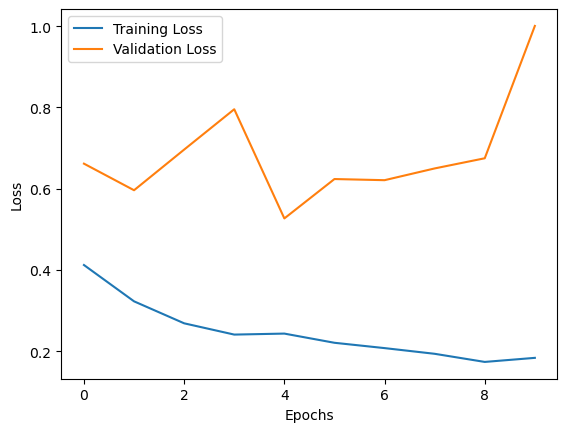

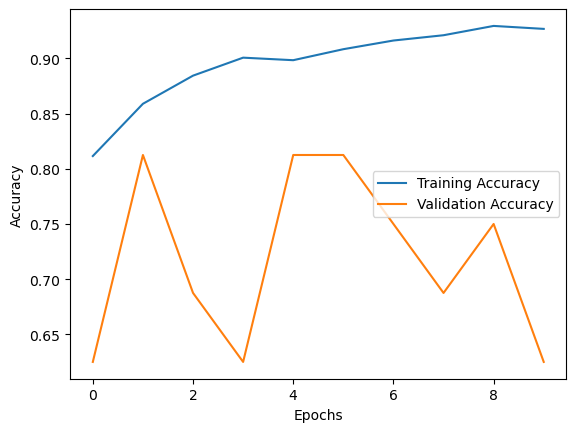

In [57]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


20/20 [==============================] - 10s 472ms/step


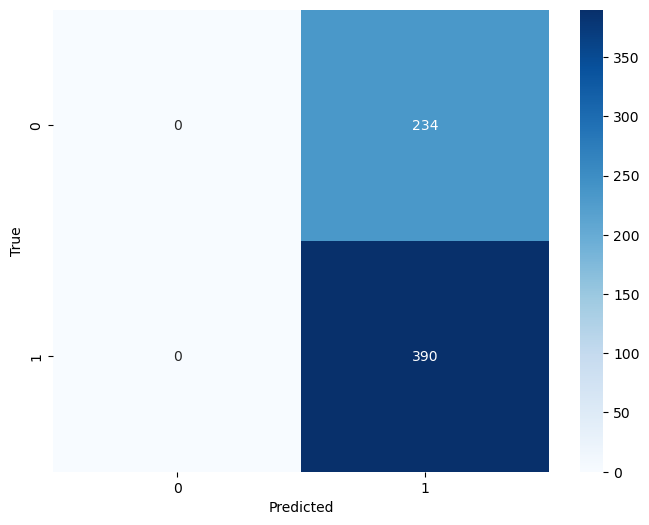

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
y_pred = model.predict(test_generator)
y_true = test_generator.classes
cm = confusion_matrix(y_true, y_pred > 0.5)  # Adjust the threshold as needed

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


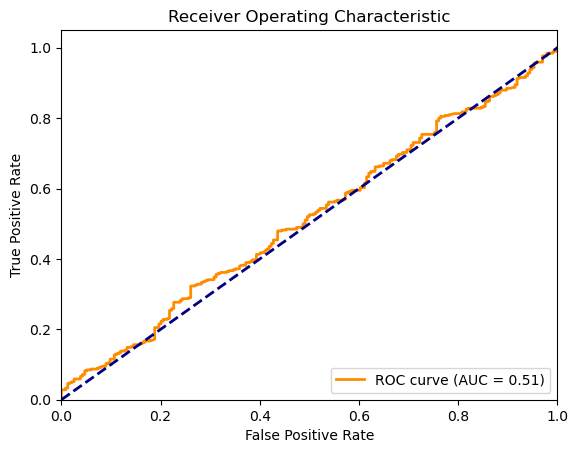

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


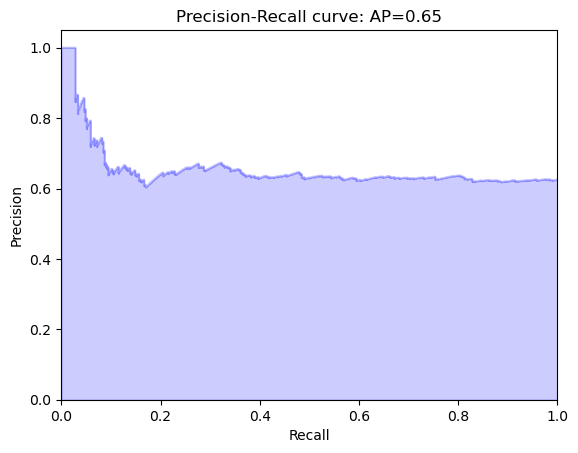

In [60]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_true, y_pred)
average_precision = average_precision_score(y_true, y_pred)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall curve: AP={average_precision:.2f}')
plt.show()


In [61]:
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 26, 26, 128)     

In [62]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split


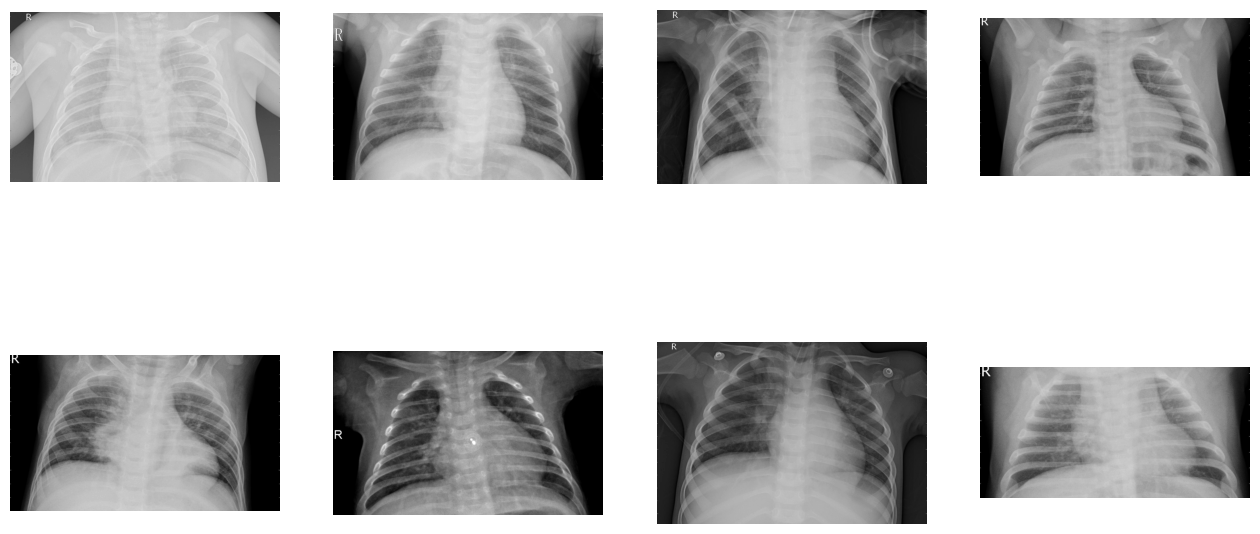

In [63]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(16, 8)

# Select the starting index for the images to display
pic_index = 210

# Create lists of the file paths for the 16 images to display
pneumonia_images = [os.path.join(PNEUMONIA_dir, fname)
                    for fname in pneumonia_names[pic_index-8:pic_index]]

# Loop through the image paths and display each image in a subplot
for i, img_path in enumerate(pneumonia_images):
    sp = plt.subplot(2, 4, i+1)
    sp.axis('Off')

    # Read in the image using Matplotlib's imread() function
    img = mpimg.imread(img_path)
    plt.imshow(img, cmap='gray')  # Display images in grayscale

# Display the plot with the 16 images in a 4x4 grid
plt.show()


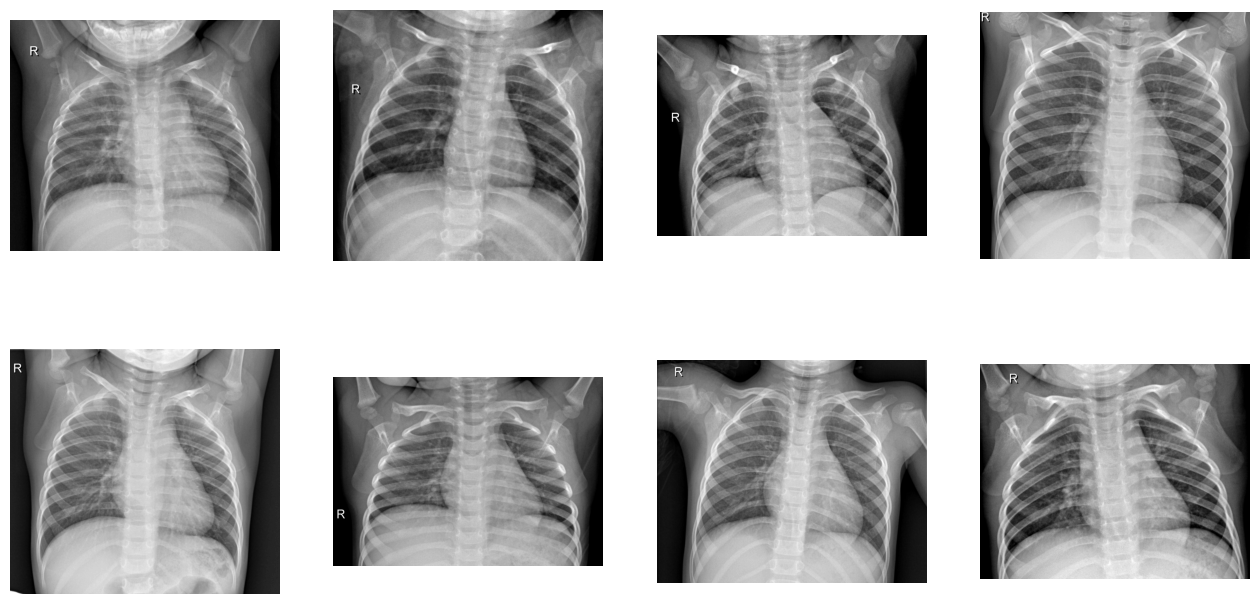

In [55]:
# Set the figure size
fig = plt.gcf()
fig.set_size_inches(16, 8)

# Select the starting index for the images to display
pic_index = 210

# Create lists of the file paths for the 16 images to display
normal_images = [os.path.join(NORMAL_dir, fname)
                 for fname in normal_names[pic_index-8:pic_index]]

# Loop through the image paths and display each image in a subplot
for i, img_path in enumerate(normal_images):
    sp = plt.subplot(2, 4, i+1)
    sp.axis('Off')

    # Read in the image using Matplotlib's imread() function
    img = mpimg.imread(img_path)
    plt.imshow(img, cmap='gray')  # Display images in grayscale

# Display the plot with the 16 images in a 4x4 grid
plt.show()
